In [42]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime

In [43]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | jabiru
City not found. Skipping...
Processing Record 3 of Set 1 | jiddah
City not found. Skipping...
Processing Record 4 of Set 1 | libreville
Processing Record 5 of Set 1 | grand gaube
Processing Record 6 of Set 1 | buzmeyin
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | gat
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | osmena
Processing Record 13 of Set 1 | vestmannaeyjar
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | soyo
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | deputat

Processing Record 38 of Set 4 | pasighat
Processing Record 39 of Set 4 | gorno-chuyskiy
City not found. Skipping...
Processing Record 40 of Set 4 | malakal
Processing Record 41 of Set 4 | vostok
Processing Record 42 of Set 4 | ambon
Processing Record 43 of Set 4 | wajir
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | hamilton
Processing Record 46 of Set 4 | jiuquan
Processing Record 47 of Set 4 | shizunai
Processing Record 48 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 4 | waingapu
Processing Record 50 of Set 4 | kysyl-syr
Processing Record 1 of Set 5 | amderma
City not found. Skipping...
Processing Record 2 of Set 5 | cidreira
Processing Record 3 of Set 5 | antalaha
Processing Record 4 of Set 5 | dutlwe
Processing Record 5 of Set 5 | sept-iles
Processing Record 6 of Set 5 | mullaitivu
City not found. Skipping...
Processing Record 7 of Set 5 | kyaikkami
Processing Record 8 of Set 5 | shirokiy
Processing Record 9 of Set 5

Processing Record 29 of Set 8 | baykit
Processing Record 30 of Set 8 | klaksvik
Processing Record 31 of Set 8 | abu dhabi
Processing Record 32 of Set 8 | gamba
Processing Record 33 of Set 8 | ixtapa
Processing Record 34 of Set 8 | abalak
Processing Record 35 of Set 8 | camacha
Processing Record 36 of Set 8 | tautira
Processing Record 37 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 38 of Set 8 | kitui
Processing Record 39 of Set 8 | hobyo
Processing Record 40 of Set 8 | stuttgart
Processing Record 41 of Set 8 | havoysund
Processing Record 42 of Set 8 | banda aceh
Processing Record 43 of Set 8 | diego de almagro
Processing Record 44 of Set 8 | derzhavinsk
Processing Record 45 of Set 8 | umm kaddadah
Processing Record 46 of Set 8 | chifeng
Processing Record 47 of Set 8 | polyarnyy
Processing Record 48 of Set 8 | wilmington
Processing Record 49 of Set 8 | berlevag
Processing Record 50 of Set 8 | whitianga
Processing Record 1 of Set 9 | storforshei
Processing Record 2 of

Processing Record 14 of Set 12 | kaeo
Processing Record 15 of Set 12 | reitz
Processing Record 16 of Set 12 | ilinskiy
Processing Record 17 of Set 12 | sola
Processing Record 18 of Set 12 | bendigo
Processing Record 19 of Set 12 | mitzic
Processing Record 20 of Set 12 | buzdyak
Processing Record 21 of Set 12 | kattivakkam
Processing Record 22 of Set 12 | ballitoville
Processing Record 23 of Set 12 | sanchursk
Processing Record 24 of Set 12 | tazovskiy
Processing Record 25 of Set 12 | bongandanga
Processing Record 26 of Set 12 | antofagasta
Processing Record 27 of Set 12 | payakumbuh
Processing Record 28 of Set 12 | puerto baquerizo moreno
Processing Record 29 of Set 12 | kalas
Processing Record 30 of Set 12 | tiarei
Processing Record 31 of Set 12 | cayenne
Processing Record 32 of Set 12 | erdenet
Processing Record 33 of Set 12 | benguela
Processing Record 34 of Set 12 | nishihara
Processing Record 35 of Set 12 | pontarlier
Processing Record 36 of Set 12 | vicuna
Processing Record 37 of

In [9]:
print(len(city_data))

557


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,67.64,86,20,1.01,US,2021-10-08 01:29:19
1,Libreville,0.3925,9.4537,78.82,89,40,9.22,GA,2021-10-08 01:30:13
2,Grand Gaube,-20.0064,57.6608,68.40,85,98,3.00,MU,2021-10-08 01:30:14
3,Buzmeyin,38.0507,58.2056,49.73,62,90,6.91,TM,2021-10-08 01:30:14
4,Iqaluit,63.7506,-68.5145,35.33,93,90,10.00,CA,2021-10-08 01:30:15
5,Gat,31.6100,34.7642,71.40,67,0,3.98,IL,2021-10-08 01:30:15
6,Castro,-24.7911,-50.0119,54.70,98,100,7.43,BR,2021-10-08 01:30:16
7,Mataura,-46.1927,168.8643,56.48,59,100,5.91,NZ,2021-10-08 01:30:16
8,Punta Arenas,-53.1500,-70.9167,46.51,53,0,18.41,CL,2021-10-08 01:29:41
9,Osmena,10.5208,119.9258,84.29,74,94,11.68,PH,2021-10-08 01:30:16


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-10-08 01:29:19,42.0970,-79.2353,67.64,86,20,1.01
1,Libreville,GA,2021-10-08 01:30:13,0.3925,9.4537,78.82,89,40,9.22
2,Grand Gaube,MU,2021-10-08 01:30:14,-20.0064,57.6608,68.40,85,98,3.00
3,Buzmeyin,TM,2021-10-08 01:30:14,38.0507,58.2056,49.73,62,90,6.91
4,Iqaluit,CA,2021-10-08 01:30:15,63.7506,-68.5145,35.33,93,90,10.00
5,Gat,IL,2021-10-08 01:30:15,31.6100,34.7642,71.40,67,0,3.98
6,Castro,BR,2021-10-08 01:30:16,-24.7911,-50.0119,54.70,98,100,7.43
7,Mataura,NZ,2021-10-08 01:30:16,-46.1927,168.8643,56.48,59,100,5.91
8,Punta Arenas,CL,2021-10-08 01:29:41,-53.1500,-70.9167,46.51,53,0,18.41
9,Osmena,PH,2021-10-08 01:30:16,10.5208,119.9258,84.29,74,94,11.68


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

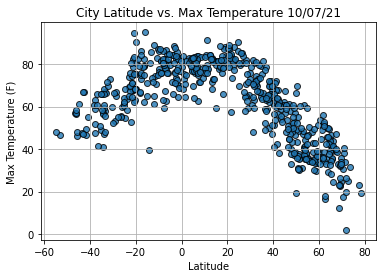

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

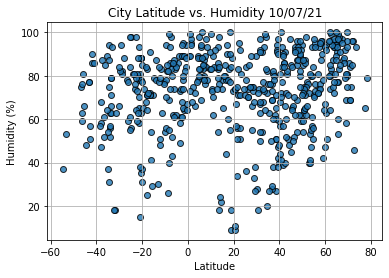

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

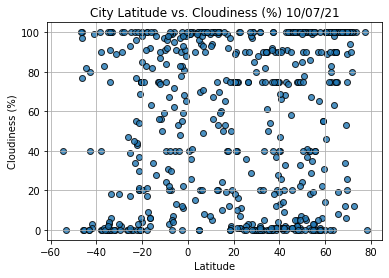

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

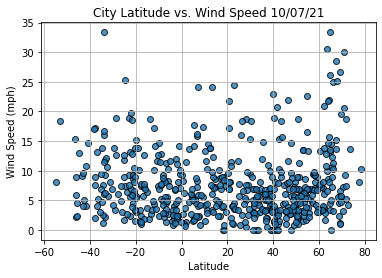

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]

In [22]:
index13

City                   Chokurdakh
Country                        RU
Date          2021-10-08 01:30:18
Lat                       70.6333
Lng                      147.9167
Max Temp                    17.58
Humidity                       84
Cloudiness                    100
Wind Speed                   7.18
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-10-08 01:29:19,42.0970,-79.2353,67.64,86,20,1.01
1,Libreville,GA,2021-10-08 01:30:13,0.3925,9.4537,78.82,89,40,9.22
3,Buzmeyin,TM,2021-10-08 01:30:14,38.0507,58.2056,49.73,62,90,6.91
4,Iqaluit,CA,2021-10-08 01:30:15,63.7506,-68.5145,35.33,93,90,10.00
5,Gat,IL,2021-10-08 01:30:15,31.6100,34.7642,71.40,67,0,3.98


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

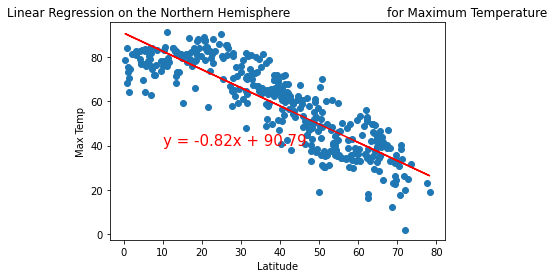

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

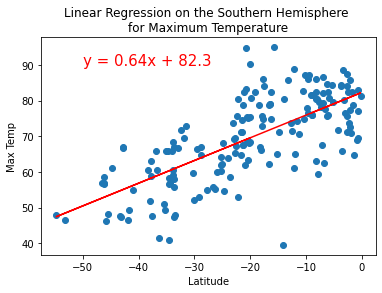

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

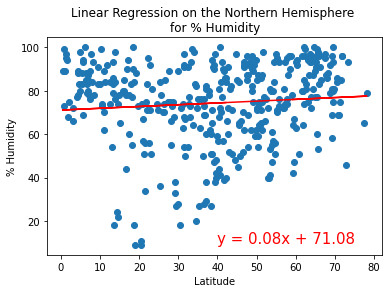

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

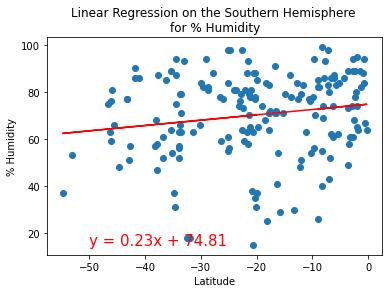

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

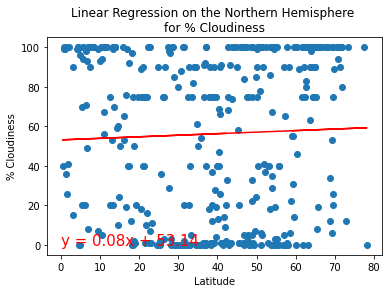

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(0,0))

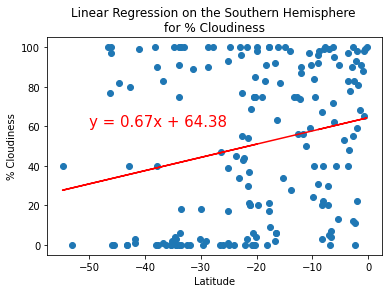

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

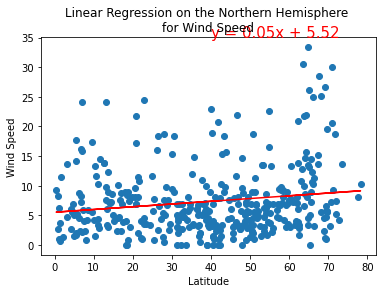

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

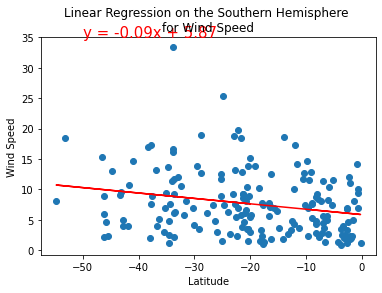

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))